In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
tf.random.set_seed(2)

In [3]:
new_image = cv2.imread("data/RAW/train/bear/0001.png")
print(new_image.shape)

(32, 32, 3)


In [4]:
TRAIN_BASE_DIRECTORY = "./data/RAW/train"
TEST_BASE_DIRECTORY = "./data/RAW/test"


image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.5)


TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 64

In [5]:
train_generator = image_data_generator.flow_from_directory(
    TRAIN_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

validation_generator = image_data_generator.flow_from_directory(
    TEST_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

Found 25000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.


In [6]:
validation_generator.classes

array([ 0,  0,  0, ..., 99, 99, 99])

In [70]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Fin obligatoire
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dense_15 (Dense)             (None, 16, 16, 64)        2112      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dense_16 (Dense)             (None, 8, 8, 128)        

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es_callback = EarlyStopping(monitor='val_loss', patience=5)

training = model.fit_generator(train_generator, epochs=50, callbacks=[es_callback], validation_data=validation_generator, shuffle=False)

Epoch 1/50
391/391 [==============================] - 49s 125ms/step - loss: 4.6235 - accuracy: 0.0674 - val_loss: 3.8454 - val_accuracy: 0.1118
Epoch 2/50
391/391 [==============================] - 49s 126ms/step - loss: 3.6599 - accuracy: 0.1502 - val_loss: 3.5593 - val_accuracy: 0.1770
Epoch 3/50
391/391 [==============================] - 53s 135ms/step - loss: 3.3217 - accuracy: 0.2100 - val_loss: 3.2754 - val_accuracy: 0.2294
Epoch 4/50
391/391 [==============================] - 51s 131ms/step - loss: 3.0668 - accuracy: 0.2562 - val_loss: 3.1183 - val_accuracy: 0.2504
Epoch 5/50
391/391 [==============================] - 49s 125ms/step - loss: 2.8700 - accuracy: 0.2950 - val_loss: 3.0186 - val_accuracy: 0.2670
Epoch 6/50
391/391 [==============================] - 46s 118ms/step - loss: 2.7041 - accuracy: 0.3252 - val_loss: 2.9997 - val_accuracy: 0.2858
Epoch 7/50
391/391 [==============================] - 45s 115ms/step - loss: 2.5613 - accuracy: 0.3548 - val_loss: 2.8908 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


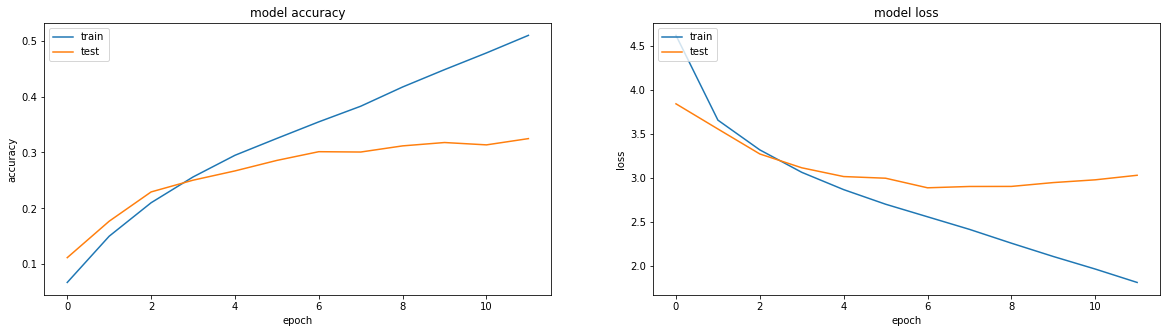

In [65]:

def print_model_history(history):
    '''
        print model training history
    '''
    # list all data in history
    print(history.history.keys())
    plt.figure(figsize=(20,5))

    plt.subplot(1,2,1)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(1,2,2)
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print_model_history(training)

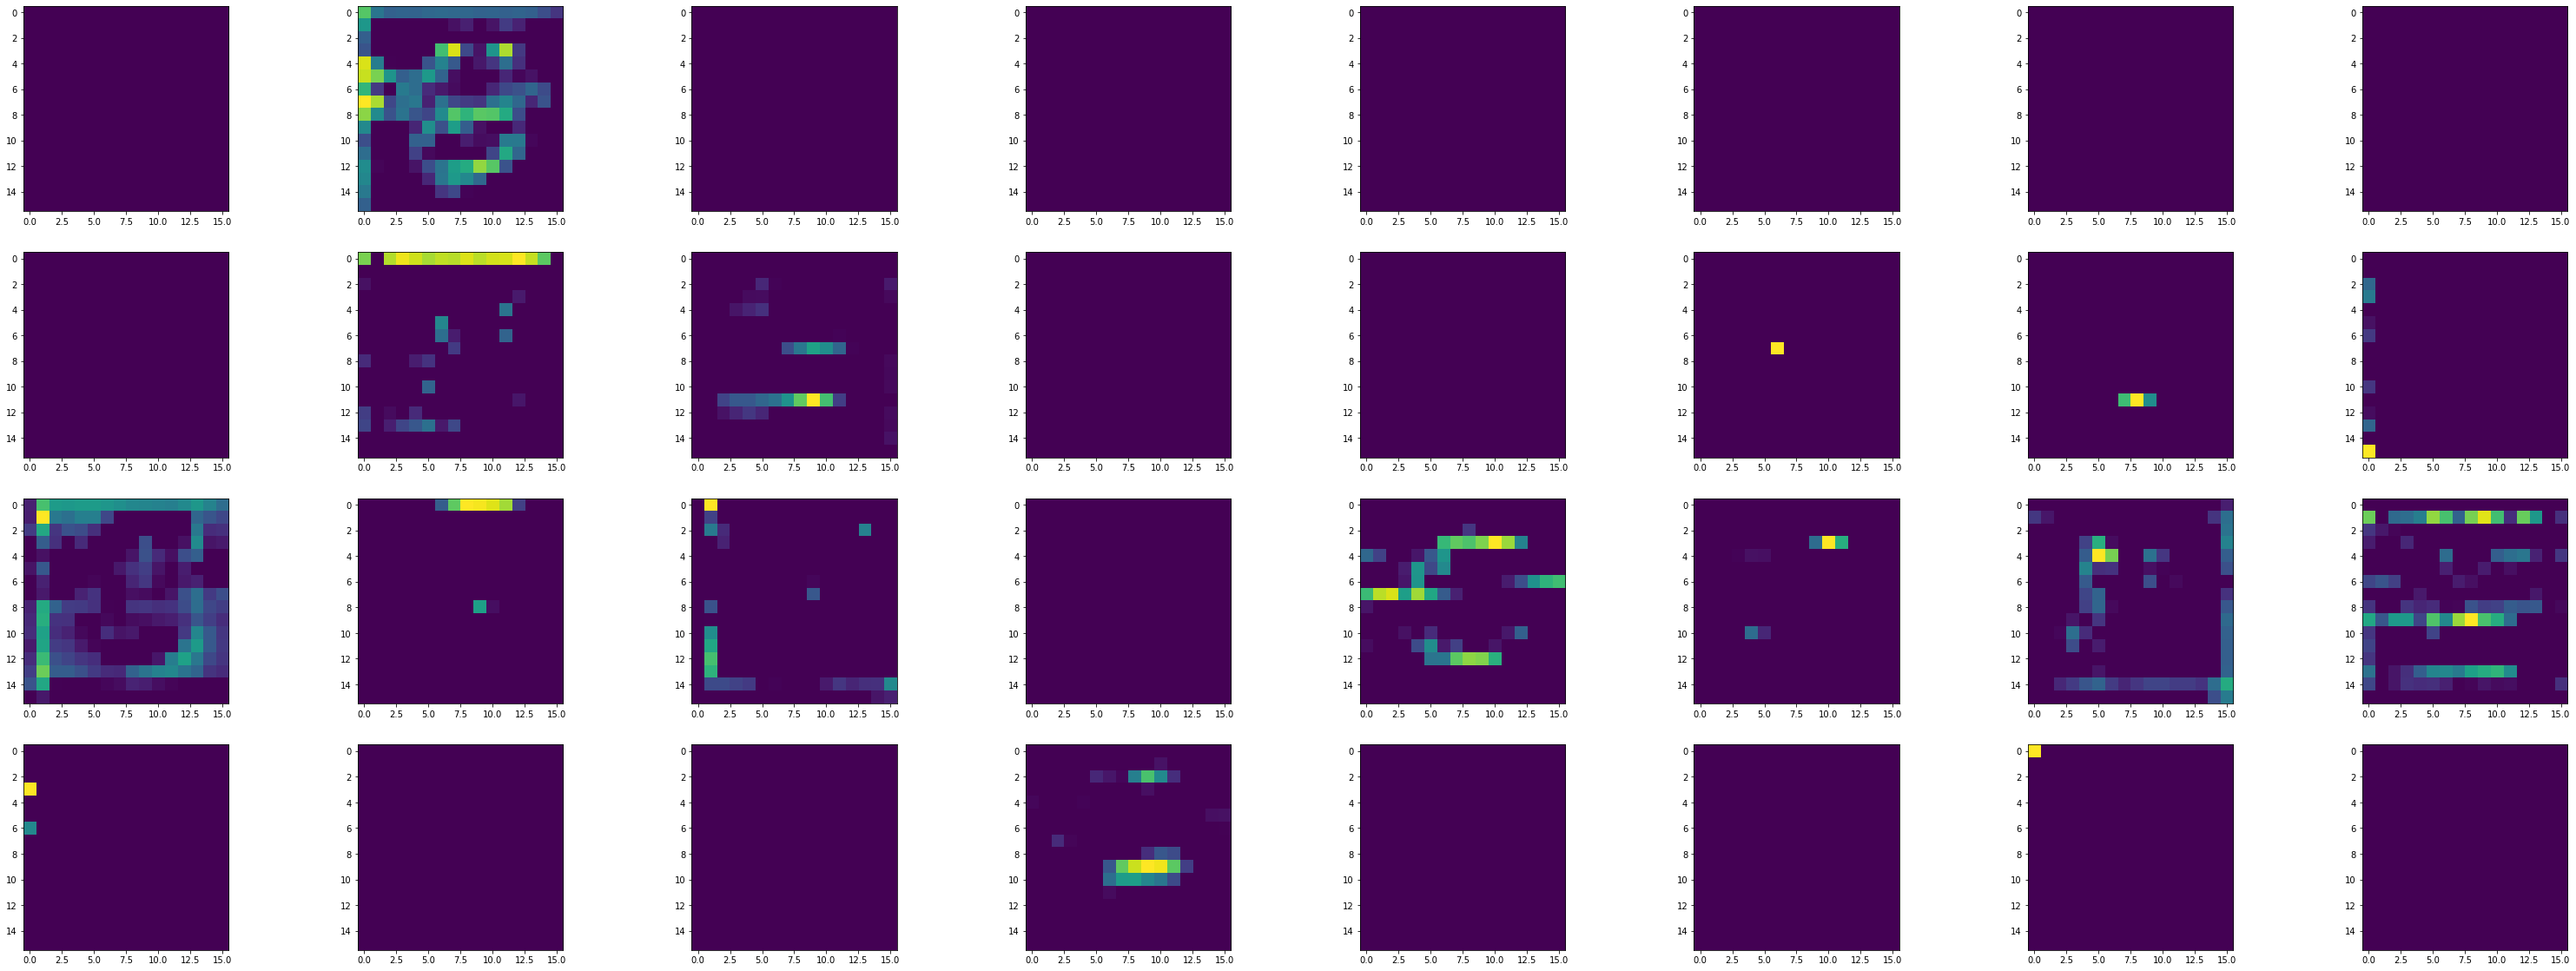

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np

layer_outputs = [layer.output for layer in model.layers]

test_image = "./data/test/test/bus/0020.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

display_activation(activations, 8, 4, 4)

In [67]:
model.save('model.h5')

In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

labels_array = os.listdir(TRAIN_BASE_DIRECTORY)

choix = r"./data/tom.jpg"
model = load_model('model.h5')

test_image = image.load_img(choix, target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
plt.plot(test_image)
plt.show
preds = model.predict_classes(test_image)
prob = model.predict_proba(test_image)

index = preds[0]
print(f'Cet objet est un(e) {labels_array[index]}.', 'probs= ', prob[0][index] * 100)

Cet objet est un(e) clock. probs=  49.34374988079071


In [62]:
model.save_weights("./data/weights.h5")